# An SIA flowline example

# Theory

### Derivation of SIA equations

The momentum balance is given by
$$\frac{\partial\tau_{xx}}{\partial x} + \frac{\partial\tau_{xy}}{\partial y}+\frac{\partial\tau_{xz}}{\partial z} = \frac{p}{\partial x}$$
$$\frac{\partial\tau_{xy}}{\partial x} + \frac{\partial\tau_{yy}}{\partial y}+\frac{\partial\tau_{yz}}{\partial z} = \frac{p}{\partial y}$$
$$\frac{\partial\tau_{xz}}{\partial x} + \frac{\partial\tau_{yz}}{\partial y}+\frac{\partial\tau_{zz}}{\partial z} = \frac{p}{\partial z} + \rho_i g$$
For the majority of an ice sheet the flow is determined by shearing parallel to the bed. Therefore, only the vertical shear stresses are considered and membrane stresses are neglected:
$$\frac{\partial\tau_{xz}}{\partial z} = \frac{p}{\partial x}$$
$$\frac{\partial\tau_{yz}}{\partial z} = \frac{p}{\partial y}$$
$$0 = \frac{p}{\partial z} + \rho_i g$$
Some excluded stresses may not be small compared to each other (e.g. $\tau_{xx}$ is comparable to $\tau_{xz}$), but if the horizontal gradient with respect to $x$ is considered, they become insignificant due to the large horizontal length scales. Integrating the momentum balance equation from the surface $s$ to a height $z$ in the ice sheet and applying stress-free boundary conditions at the surface leads to
$$\tau_{xz}(z) = -\rho_i g (s-z) \frac{\partial s}{\partial x}$$
$$\tau_{yz}(z) = -\rho_i g (s-z) \frac{\partial s}{\partial y}$$
The SIA stress field can be fully determined if the local geometry (surface elevation, ice thickness, surface slope) are known. The locally defined ice mass is not affected by upstream or downstream ice through membrane stresses. The velocity can be calculated explitly using a flow law. Since the effective stress is given by $\sigma_e = \sqrt{\tau_{xy}^2 + \tau_{xz}^2}$, the velocities are given by
$$\frac{\partial u}{\partial z} = -2A \left(\rho_i g (s-z) \right)^n \left|\nabla s\right|^{n-1} \frac{\partial s}{\partial x}$$
$$\frac{\partial v}{\partial z} = -2A \left(\rho_i g (s-z) \right)^n \left|\nabla s\right|^{n-1} \frac{\partial s}{\partial y}$$
Integrating from the base of the ice sheet $b$ to a height $z$ gives
$$u(z)-u(b) = \frac{2A}{n+1} (\rho_i g) ^n \left|\nabla s\right|^{n-1} \frac{\partial s}{\partial x} \left( (s-z)^{n+1} - h^{n+1} \right)$$
$$v(z)-v(b) = \frac{2A}{n+1} (\rho_i g) ^n \left|\nabla s\right|^{n-1} \frac{\partial s}{\partial y} \left( (s-z)^{n+1} - h^{n+1} \right)$$
In terms of the vertical mean horizontal velocity, one gets
$$\bar{u} -u(b) = - \frac{2A}{n+1} (\rho_i g) ^n \left|\nabla s\right|^{n-1} \frac{\partial s}{\partial x}  h^{n+1} $$
$$\bar{v} -v(b) = - \frac{2A}{n+1} (\rho_i g) ^n \left|\nabla s\right|^{n-1} \frac{\partial s}{\partial y}  h^{n+1} $$

### Numerical formulation as an advective equation
We are considering a 2d flow line model, where $z$ gives the ice thickness and $x$ the horizontal extend of the ice sheet.
Neglecting basal sliding, the vertical mean horizontal velocity is given by
$$ \bar{u} = - \frac{2A}{n+2}(\rho_i g)^n \left| \frac{\partial s}{\partial x} \right| ^{n-1}  \frac{\partial s}{\partial x} h ^{n-1}\,,$$
with surface elevation $s=b+h$.
Neglecting also basal and surface melting, the surface mass balance is governed by a constant accumulation rate $\dot{a}$ and the mass balance becomes
$$\frac{\partial h}{\partial t} = - \frac{\partial (q)}{\partial x} + \dot{a}\,,$$
with the fluxes $q=\bar{u}h$.

Using a staggered grid, these equations become
$$h_{i,t+1} = h_{i,t} + \left( q_{i+1/2,t} -q_{i-1/2,t} \right) \frac{\Delta t}{\Delta x} + \dot{a} \Delta t\,$$
$$q_{i+1/2,t} = \frac{2A}{n+2}(\rho_i g)^n \left( \frac{h_{i+1,t}+b_{i+1,t} - h_{i,t}-b_{i,t}}{\Delta x} \right) ^n \left( \frac{h_{i,t}+h_{i+1,t}}{2}\right)^{n+2}\,$$
$$q_{i-1/2,t} = \frac{2A}{n+2}(\rho_i g)^n \left( \frac{h_{i,t}+b_{i,t} - h_{i-1,t}-b_{i-1,t}}{\Delta x} \right) ^n \left( \frac{h_{i,t}+h_{i-1,t}}{2}\right)^{n+2}\,$$

### Numerical formulation as a diffusion equation
Pure advection equations can be unstable in finite difference methods. Looking closer at the mass balance reveals that it is a diffusion equation and not an advection eqaution because $q$ depends on $\partial h / \partial x$. The mass balance can be rewritten as
$$\frac{\partial h}{\partial t} = \frac{\partial }{\partial x} \left( d \frac{\partial (h+b)}{\partial x} \right) + \dot{a}$$
with the spatially-varying diffusion coefficient
$$d = - \frac{2A}{n+2} (\rho_i g) ^n \left|\frac{\partial (h+b)}{\partial x}\right|^{n-2} \frac{\partial (h+b)}{\partial y}  h^{n+2} $$
Using again a staggered grid, these equations become
$$ h_{i,t+1} = h_{i,t} + \frac{\Delta t}{(\Delta x)^2} \left[ d_{i+1/2,t} ( h_{i+1,t} + b_{i+1,t} - h_{i,t} - b_{i,t} ) - d_{i-1/2,t} ( h_{i,t} + b_{i,t} - h_{i-1,t} - b_{i-1,t} ) \right] + \dot{a}$$
$$d_{i+1/2,t} = \frac{2A}{n+2} (\rho_i g) ^n \left|\frac{h_{i+1,t} + b_{i+1,t} - h_{i,t} - b_{i,t}}{\Delta x}\right|^{n-1}  \left( \frac{h_{i,t} + h_{i+1,t}}{2}\right)^{n+2}$$
$$d_{i-1/2,t} = \frac{2A}{n+2} (\rho_i g) ^n \left|\frac{h_{i,t} + b_{i,t} - h_{i-1,t} - b_{i-1,t}}{\Delta x}\right|^{n-1}  \left( \frac{h_{i,t} + h_{i-1,t}}{2}\right)^{n+2}$$


### Semi-implicit numerical formulation
Even greater numerical stability can be achieved by solving an implicit equation, where the right hand side is evaluated at time $t+1$ instead of $t$. The diffusion coefficients $d$ are still a function of $h$, so this is a semi-implicit method, which is less stable than the full implicit method. We rewrite the above equation as
$$ h_{i,t+1} = h_{i,t} + \frac{\Delta t}{(\Delta x)^2} \left[ d_{i+1/2,t} ( h_{i+1,t+1} + b_{i+1,t} - h_{i,t+1} - b_{i,t} ) - d_{i-1/2,t} ( h_{i,t+1} + b_{i,t} - h_{i-1,t+1} - b_{i-1,t} ) \right] + \dot{a}$$
Sorting the terms gives
$$ h_{i,t+1} - \frac{\Delta t}{(\Delta x)^2} \left[ d_{i+1/2,t} ( h_{i+1,t+1}  - h_{i,t+1} ) - d_{i-1/2,t} ( h_{i,t+1}  - h_{i-1,t+1}  ) \right] =  h_{i,t} + \frac{\Delta t}{(\Delta x)^2} \left[ d_{i+1/2,t} ( b_{i+1,t}  - b_{i,t})  - d_{i-1/2,t} ( b_{i,t} - b_{i-1,t})  \right]+ \dot{a}$$
Now we define some coefficients as functions of $h$:
$$\alpha_i =  \frac{\Delta t}{(\Delta x)^2}d_{i-1/2,t}$$
$$ \beta_i = 1 +\frac{\Delta t}{(\Delta x)^2} ( d_{i-1/2,t} + d_{i+1/2,t} )$$
$$\gamma_i =  \frac{\Delta t}{(\Delta x)^2}d_{i+1/2,t}$$
$$\delta_i = \alpha_i b_{i-1,t} - (\beta_i-1)b_{i,t} + \gamma_i b_{i+1,t} +h_{i,t} + \dot{a}\Delta t$$
So the equation becomes
$$-\alpha_i h_{i-1,t+1} + \beta_i h_{i,t+1} -\gamma_i h_{i+1,t+1} = \delta_i$$
This is a tridiagonal system of equations. Consider the following equations between two grid points:
$$h_i = f_i h_{i+1} + g_i$$
$$h_{i-1} = f_{i-1} h_{i} + g_{i-1}$$
Multiplying with $\alpha_i$ gives
$$\alpha_i h_{i-1} = \alpha_if_{i-1} h_{i} + \alpha_i g_{i-1} =  \beta_i h_{i,t+1} -\gamma_i h_{i+1,t+1} - \delta_i$$
Solving these equations yields
$$h_i = f_i h_{i+1} + g_i$$
$$f_i = \frac{\gamma_i}{\beta_i - \alpha_i f_{i-1}}$$
$$g_i =\frac{\delta_i + \alpha_i g_{i-1}}{\beta_i - \alpha_i g_{i-1}}$$

### Boundary conditions
Ice thickness at the boundaries is zero, i.e. $h_0 = h_N = 0$. ALso the coefficients $f_0 = f_N =g_0 = g_N= 0$.

## Numerical solutions

In [1]:
# Python setup
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

# Catching warnings as errors
import warnings
warnings.filterwarnings("error")

# Making plots nicer
plt.rcParams['figure.figsize'] = 12,8
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['font.sans-serif'] = [u"Liberation Sans"] + plt.rcParams['font.sans-serif']
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['axes.xmargin'] =  0.1  # x margin.  See `axes.Axes.margins`
plt.rcParams['axes.ymargin'] =  0.1  # y margin See `axes.Axes.margins`
plt.rcParams['image.cmap'] = 'magma'

In [2]:
# Physical parameters
A = 1e-16 # Ice flow parameter
rho = 910 # Ice density
grav = 9.81 # Gravitation constant
n = 3 # Glen index
a = 0.3 # Surface mass balance

# Model setup
N = 51 # Number of grid points
L = 1.5e6 # Length of domain
time_end = 2e4 # Run time

### A flat ice sheet

In [3]:
b = np.zeros(N) # Bedrock elevation

#### As a diffusion problem

In [4]:
def solve_diffusion(b,L,time_end,dt,plot_runaway=False,runaway=0):
    N = len(b)
    dx = L/ (N-1) # Grid spacing
    x = np.linspace(0,L,N) # Horizontal distance
    
    # Initialising
    h = np.zeros(N) # Ice thickness
    d = np.zeros(N) # Diffusion coefficients
    time_lapse = int(np.round(time_end / dt) +1)
    h_new = h

    # time stepping
    for i in range(time_lapse): 
        slope = np.diff(b+h) / dx # slope on a staggered grid
        # compute diffusion coefficients
        try:
            for j in range(N-1): 
                hstag = (h[j+1]  + h[j]) /2 # ice thickness on staggered grid
                d[j] = 2/(n+2) * A * hstag**2 *slope[j]**2 * (rho*grav*hstag)**n
        except RuntimeWarning:
            print("RuntimeWarning at time step ",i)
            break
        # compute ice thickness
        for j in range(1,N-1):
            h_new[j] = h[j] + (d[j] * slope[j] - d[j-1] * slope[j-1]) * dt / dx + a * dt
        h = h_new
        if i%100 == 0:
            plt.plot(x,h)
        if plot_runaway and i == runaway:
            plt.plot(x,h)
    plt.xlim(0,L)
    if not plot_runaway:
        plt.ylim(0,1.1* np.max(h))

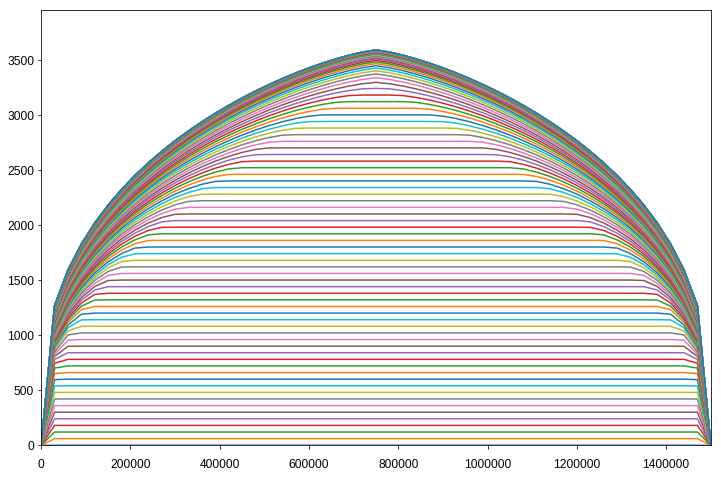

In [5]:
dt = 2 # Time step
solve_diffusion(b,L,time_end,dt)

RuntimeWarning at time step  1042


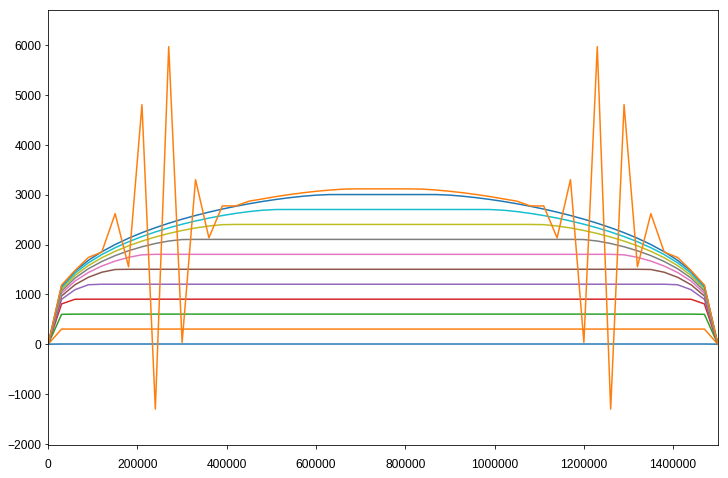

In [6]:
dt = 10 # Time step
solve_diffusion(b,L,time_end,dt,plot_runaway=True,runaway=1038)

Increasing the time step leads to runaway fluctuations in ice thickness. 

#### Semi-implicit formulation

In [7]:
def solve_implicit(b,L,time_end,dt):
    N = len(b)
    dx = L/ (N-1) # Grid spacing
    x = np.linspace(0,L,N) # Horizontal distance

                    
    # Initializing
    h = np.zeros(N) # Ice thickness
    d = np.zeros(N) # Diffusion coefficients
    alpha = np.zeros(N) 
    beta = np.zeros(N) 
    gamma = np.zeros(N) 
    delta = np.zeros(N) 
    f = np.zeros(N) 
    g = np.zeros(N)
    time_lapse = int(np.round(time_end / dt) +1)
    dtdx = dt / dx**2

    # time stepping
    for i in range(time_lapse):
        slope = np.diff(b+h) / dx # slope on a staggered grid
        # compute diffusion coefficients
        for j in range(N-1): 
            hstag = (h[j+1] + h[j]) /2 # ice thickness on staggered grid
            d[j] = 2/(n+2) * A * hstag**2 *slope[j]**2 * (rho*grav*hstag)**n
        # compute greek parameters
        for j in range(1,N-1):
            alpha[j] = d[j-1] * dtdx
            gamma[j] = d[j] * dtdx
            beta[j] = 1 + gamma[j] + alpha[j]
            delta[j] = h[j] +a * dt + alpha[j] * b[j-1] - (beta[j]-1) * b[j] + gamma[j] * b[j+1]
        # compute f and g
        for j in range(1,N-1):
            f[j] = gamma[j] / (beta[j] - alpha[j] * f[j-1])
            g[j] = ( delta[j] + alpha[j] * g[j-1]) / (beta[j] - alpha[j] * f[j-1])
        # compute ice thickness
        h_new = np.zeros(N)
        for j in range(2,N-1):
            l = N-j
            h_new[l] = g[l] + f[l] * h_new[l+1]
        h = h_new

        if i%100 == 0:
            plt.plot(x,b+h)
    plt.xlim(0,L)
    plt.ylim(np.min(b+h),1.1* np.max(b+h))
    plt.plot(x,b,linewidth=7,color="black")

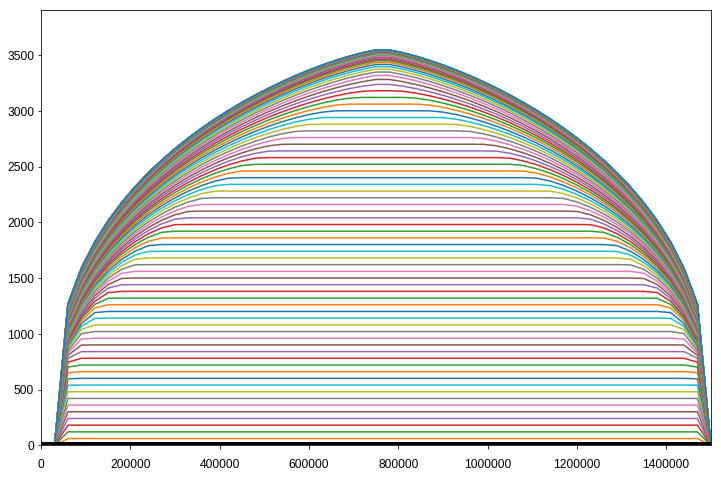

In [8]:
dt = 2 # time step
solve_implicit(b,L,time_end,dt)

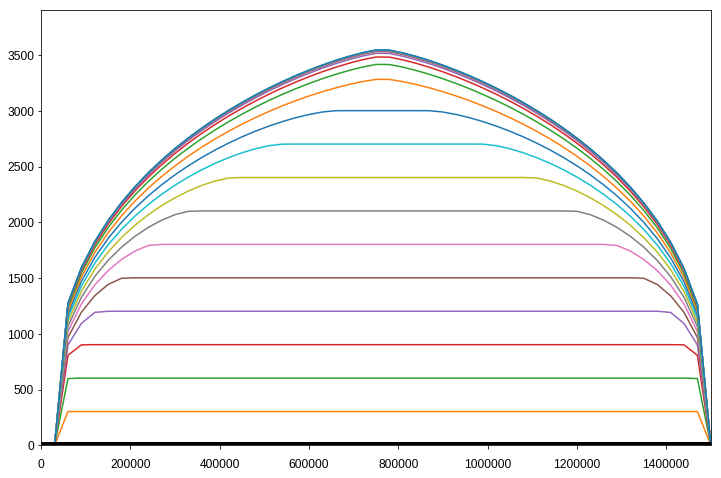

In [9]:
dt = 10 # time step
solve_implicit(b,L,time_end,dt)

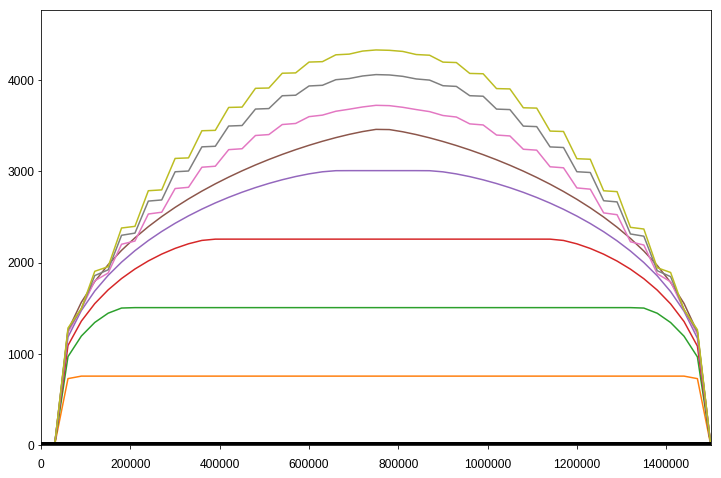

In [10]:
dt = 25 # time step
solve_implicit(b,L,time_end,dt)

The semi-implicit method is stable with an increased time step. Making the time step even larger leads to an unphysical solution that is however numerically stable.

### An icesheet on a sloped bed

#### Constant mass balance

In [11]:
angle = 0.1 # in degree
tan = np.tan(angle*np.pi/180)
x = np.linspace(0,L,N) # Horizontal distance

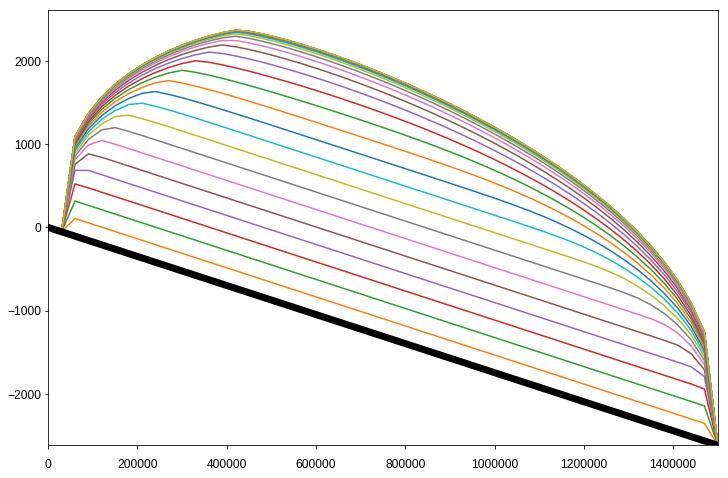

In [12]:
b = -tan*x
dt = 7 # time step
solve_implicit(b,L,time_end,dt)

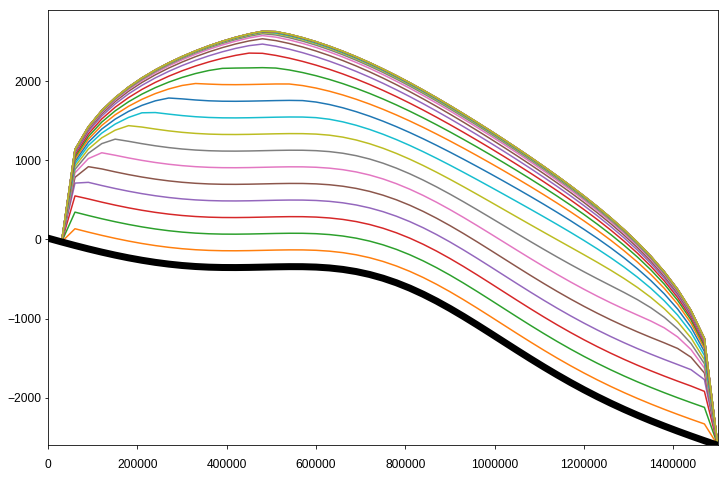

In [13]:
b = -tan*x + np.exp(-(x-L/2)**2/(L/4)**2) / (0.7*tan)
dt = 7 # time step
solve_implicit(b,L,time_end,dt)

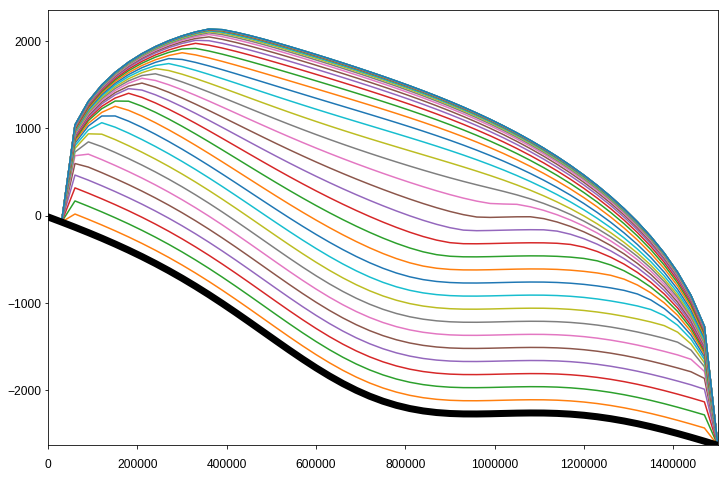

In [14]:
b = -tan*x - np.exp(-(x-L/2)**2/(L/4)**2) / (0.7*tan)
dt = 5 # time step
solve_implicit(b,L,time_end,dt)

#### Mass balance with equilibrium altitude
Now mass balance $a$ is a function of surface elevation $s$. The equilibrium altitude $E$ separates melting and precipation.
$$a = (s-E) \cdot e$$
Then it is possible to find steady states, where the ice sheet extend is smaller than the allowed computational domain.

In [15]:
def solve_implicit_mb(b,L,time_end,dt,E,e,plot_time=100,h_init=np.zeros(N),plot_E=True):
    N = len(b)
    dx = L/ (N-1) # Grid spacing
    x = np.linspace(0,L,N) # Horizontal distance
              
    # Initializing
    h = h_init
    #h = np.zeros(N) # Ice thickness
    d = np.zeros(N) # Diffusion coefficients
    alpha = np.zeros(N) 
    beta = np.zeros(N) 
    gamma = np.zeros(N) 
    delta = np.zeros(N) 
    f = np.zeros(N) 
    g = np.zeros(N)
    time_lapse = int(np.round(time_end / dt) +1)
    dtdx = dt / dx**2

    # time stepping
    for i in range(time_lapse):
        slope = np.diff(b+h) / dx # slope on a staggered grid
        # compute diffusion coefficients
        for j in range(N-1): 
            hstag = (h[j+1] + h[j]) /2 # ice thickness on staggered grid
            d[j] = 2/(n+2) * A * hstag**2 *slope[j]**2 * (rho*grav*hstag)**n
        # compute greek parameters
        for j in range(1,N-1):
            # compute mass balance
            a = (b[j]+h[j] - E) * e
            if h[j]<0 and a<0:
                a=0
            alpha[j] = d[j-1] * dtdx
            gamma[j] = d[j] * dtdx
            beta[j] = 1 + gamma[j] + alpha[j]
            delta[j] = h[j] +a * dt + alpha[j] * b[j-1] - (beta[j]-1) * b[j] + gamma[j] * b[j+1]
        # compute f and g
        for j in range(1,N-1):
            f[j] = gamma[j] / (beta[j] - alpha[j] * f[j-1])
            g[j] = ( delta[j] + alpha[j] * g[j-1]) / (beta[j] - alpha[j] * f[j-1])
        # compute ice thickness
        h_new = np.zeros(N)
        for j in range(2,N-1):
            l = N-j
            h_new[l] = g[l] + f[l] * h_new[l+1]
        h = h_new
        
        if plot_time != 0:
            if i%plot_time == 0:
                plt.plot(x,b+h)
    plt.xlim(0,L)
    plt.ylim(np.min(b+h),1.1* np.max(b+h))
    plt.plot(x,b+h,linewidth=2)
    plt.plot(x,b,linewidth=7,color="black")
    if plot_E:
        plt.plot(x,E*np.ones(N),linewidth=5,color="blue")
    return h

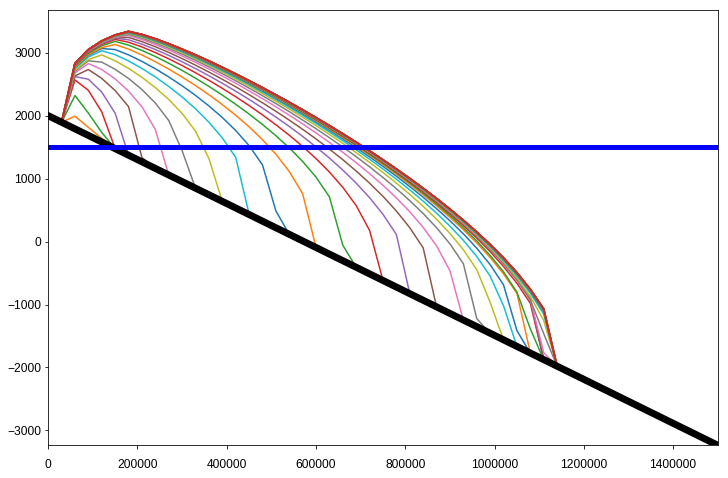

In [16]:
E = 1500
e = 0.3 / 2000
b = -2*tan*x + 2000
dt = 7 # time step
time_end = 15e4 # Run time
h=solve_implicit_mb(b,L,time_end,dt,E,e,plot_time=500)

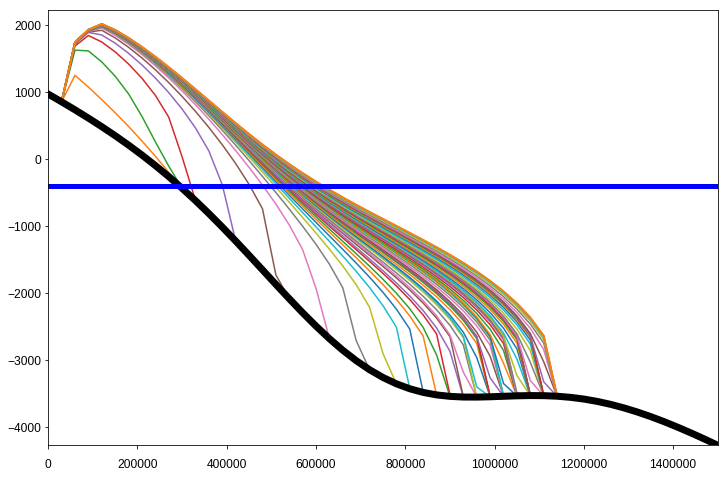

In [17]:
b = -2*tan*x - 2*np.exp(-(x-L/2)**2/(L/4)**2) / (0.7*tan)+ 1000
E = -400
dt = 5 # time step
time_end = 15e4 # Run time
h=solve_implicit_mb(b,L,time_end,dt,E,e,plot_time=500)

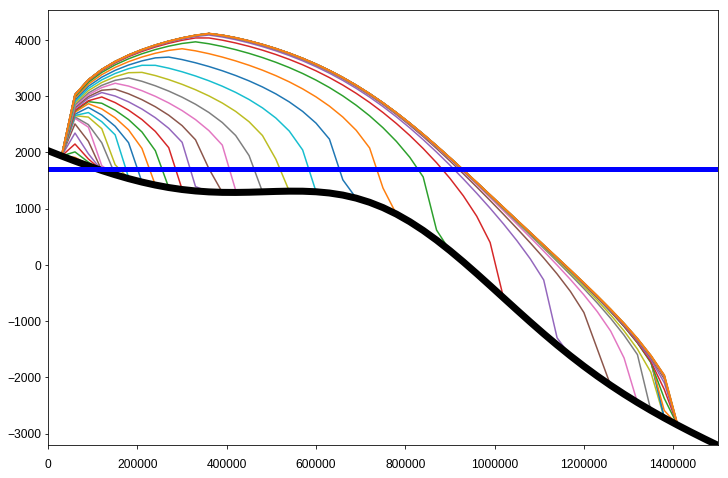

In [18]:
b = -2*tan*x + 2*np.exp(-(x-L/2)**2/(L/4)**2) / (0.7*tan)+ 2000
E = 1700
dt = 5 # time step
time_end = 10e4 # Run time
h=solve_implicit_mb(b,L,time_end,dt,E,e,plot_time=500)

#### Migrating equilibrium line

In [19]:
b = -2*tan*x - 3*np.exp(-(x-L/2)**2/(L/4)**2) / (0.7*tan)+ 1000
dt = 5 # time step
time_end = 15e4 # Run time
E_list = np.linspace(-300,-1000,15) + 4500
E_list = np.append(E_list,np.flipud(E_list[0:-1]))
print(E_list)
#E_list = np.array([0,-200,-250,-275,-300,-325,-350,-375,-400,-425,-450,-475,-500,-525,-550,-575,-600,-575,-550,-525,-500,-475,-450,-425,-400,-375,-350,-325,-300,-275,-250,-200,0])
l_list = np.zeros(len(E_list))

[ 4200.  4150.  4100.  4050.  4000.  3950.  3900.  3850.  3800.  3750.
  3700.  3650.  3600.  3550.  3500.  3550.  3600.  3650.  3700.  3750.
  3800.  3850.  3900.  3950.  4000.  4050.  4100.  4150.  4200.]


In [20]:
def ice_sheet_size(h):
    N = len(h)
    for i in range(N):
        if h[N-i-1]>1e-5:
            return L *(1-i/N)        

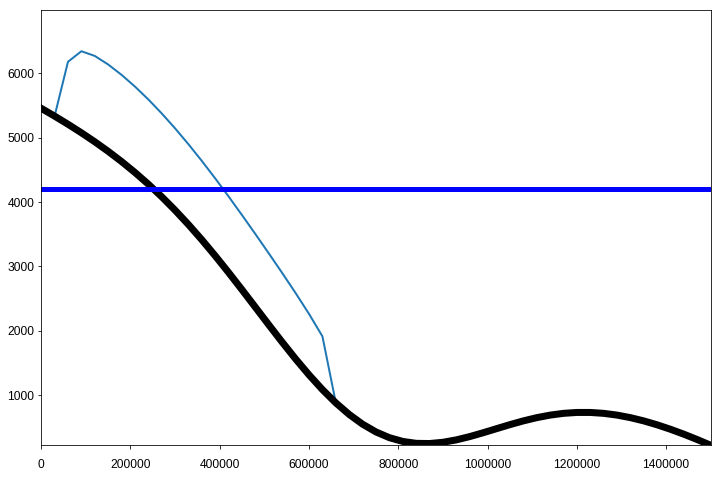

In [24]:
i = 0
E = E_list[i]
h = solve_implicit_mb(b,L,time_end,dt,E,e,plot_time=0)
l_list[i] = ice_sheet_size(h)

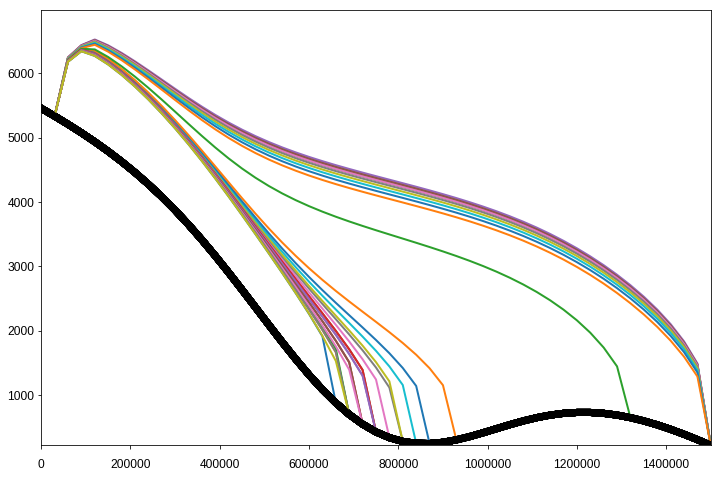

In [25]:
b = -2*tan*x - 3*np.exp(-(x-L/2)**2/(L/4)**2) / (0.7*tan)+ 5500
dt = 3
for i in range(len(E_list)):
    E = E_list[i]
    h_new = solve_implicit_mb(b,L,time_end,dt,E,e,plot_time=0,h_init=h,plot_E=False)
    h = h_new
    l_list[i] = ice_sheet_size(h)

Text(0,0.5,'glacer length in km')

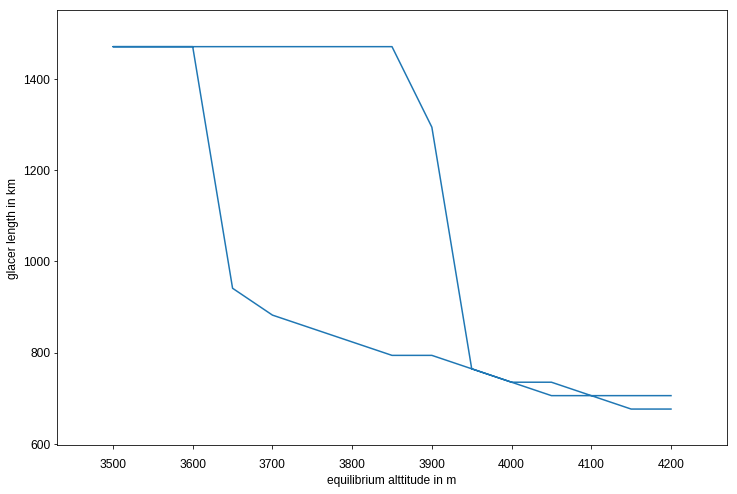

In [26]:
plt.plot(E_list,l_list*1e-3)
plt.xlabel("equilibrium alttitude in m")
plt.ylabel("glacer length in km")

## Evolve a horizontal slab of ice

In [68]:
def solve_implicit_hor(b,L,time_end,dt):
    N = len(b)
    dx = L/ (N-1) # Grid spacing
    x = np.linspace(0,L,N) # Horizontal distance

                    
    # Initializing
    h =np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.05,  0.1,  0.15,  0.2,  0.25,  0.5,  0.75,  1.,  1.,  1.,
  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
  1.,  0.75,  0.5,  0.25,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
    h=h*1000
    d = np.zeros(N) # Diffusion coefficients
    alpha = np.zeros(N) 
    beta = np.zeros(N) 
    gamma = np.zeros(N) 
    delta = np.zeros(N) 
    f = np.zeros(N) 
    g = np.zeros(N)
    time_lapse = int(np.round(time_end / dt) +1)
    dtdx = dt / dx**2

    # time stepping
    for i in range(time_lapse):
        slope = np.diff(b+h) / dx # slope on a staggered grid
        # compute diffusion coefficients
        for j in range(N-1): 
            hstag = (h[j+1] + h[j]) /2 # ice thickness on staggered grid
            d[j] = 2/(n+2) * A * hstag**2 *slope[j]**2 * (rho*grav*hstag)**n
        # compute greek parameters
        for j in range(1,N-1):
            alpha[j] = d[j-1] * dtdx
            gamma[j] = d[j] * dtdx
            beta[j] = 1 + gamma[j] + alpha[j]
            delta[j] = h[j] +a * dt + alpha[j] * b[j-1] - (beta[j]-1) * b[j] + gamma[j] * b[j+1]
        # compute f and g
        for j in range(1,N-1):
            f[j] = gamma[j] / (beta[j] - alpha[j] * f[j-1])
            g[j] = ( delta[j] + alpha[j] * g[j-1]) / (beta[j] - alpha[j] * f[j-1])
        # compute ice thickness
        h_new = np.zeros(N)
        for j in range(2,N-1):
            l = N-j
            h_new[l] = g[l] + f[l] * h_new[l+1]
        h = h_new

        if i%5000 == 0:
            plt.plot(x,b+h)
    plt.xlim(0,L)
    plt.ylim(np.min(b+h),1.1* np.max(b+h))
    plt.plot(x,b,linewidth=7,color="black")

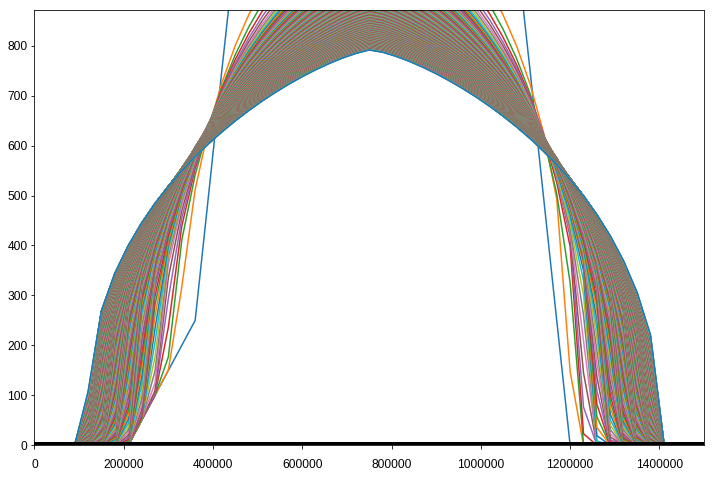

In [69]:
b = np.zeros(N) # Bedrock elevation
a=0
dt = 10 # time step
time_end = 15e6 # Run time
solve_implicit_hor(b,L,time_end,dt)